In [1]:
from google.colab import drive
drive.mount('/content/drive')
import warnings

# Ignorer les avertissements spécifiques de scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


Mounted at /content/drive


In [2]:
%reload_ext autoreload
%autoreload 2

import gc
import random

# numpy et pandas pour la manipulation du data
import numpy as np
import pandas as pd

# sklearn
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing, model_selection, linear_model, metrics, impute, ensemble
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# hyperopt
from hyperopt import fmin, tpe, hp, anneal, Trials, space_eval

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour tracer les graphes
import matplotlib.pyplot as plt

#autres librairies
import missingno as msno

# Chargement des données

In [3]:
# Specify the correct path to your CSV file in Google Drive
csv_path = '/content/drive/MyDrive/openclass/flipkart_com-ecommerce_sample_1050.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [4]:
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [5]:
# Sélectionner les variables quantitatives (numériques)
quantitative_variables = df.select_dtypes(include=['int64', 'float64'])
print("Variables quantitatives :")
print(quantitative_variables)

# Sélectionner les variables qualitatives (catégorielles)
qualitative_variables = df.select_dtypes(include=['object'])
print("\nVariables qualitatives :")
print(qualitative_variables)


Variables quantitatives :
      retail_price  discounted_price
0           1899.0             899.0
1            600.0             449.0
2              NaN               NaN
3           2699.0            1299.0
4           2599.0             698.0
...            ...               ...
1045        1399.0             999.0
1046        4930.0            1896.0
1047        4500.0            1449.0
1048        3465.0            1333.0
1049        1190.0             595.0

[1050 rows x 2 columns]

Variables qualitatives :
                               uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...

In [6]:
# Vérifier s'il y a des doublons dans le DataFrame
if df.duplicated().any():
    print("Il y a des doublons dans le jeu de données.")
else:
    print("Il n'y a pas de doublons dans le jeu de données.")

Il n'y a pas de doublons dans le jeu de données.


In [7]:
# Compter le nombre de valeurs NaN dans chaque colonne
nan_count = df.isna().sum()

print("Nombre de valeurs NaN dans le jeu de données :")
print(nan_count)

# Supprimer les lignes contenant des valeurs NaN
df_cleaned = df.dropna()

# Afficher la forme du DataFrame après suppression des lignes contenant des NaN
print("\nForme du DataFrame après suppression des lignes contenant des NaN :", df_cleaned.shape)

Nombre de valeurs NaN dans le jeu de données :
uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Forme du DataFrame après suppression des lignes contenant des NaN : (710, 15)


In [8]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values = df_cleaned.isnull().sum()
print("\nValeurs manquantes :")
print(missing_values)


Valeurs manquantes :
uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64


In [9]:
df=df_cleaned

# Analyse univariée des variables

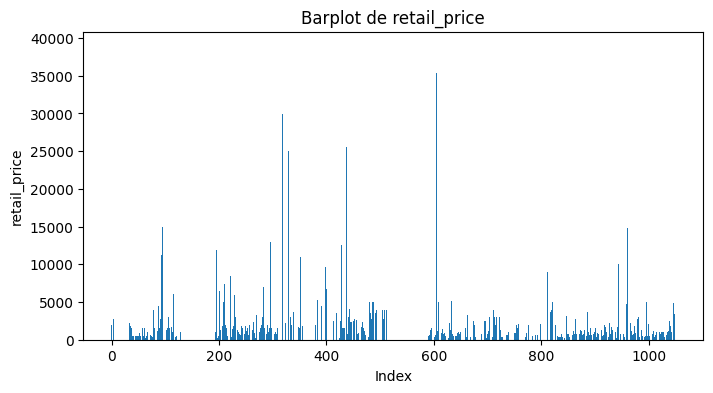

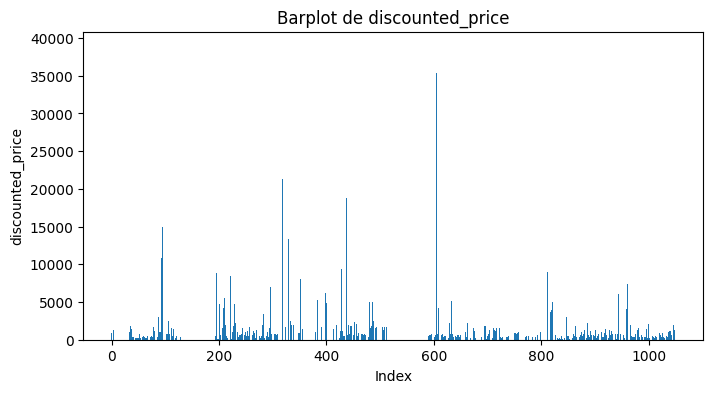

In [10]:
import matplotlib.pyplot as plt

# Par exemple, supposons que quantitative_variables contient les colonnes quantitatives
for column in quantitative_variables.columns:
    plt.figure(figsize=(8, 4))
    plt.bar(df.index, df[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Barplot de {column}')
    plt.show()

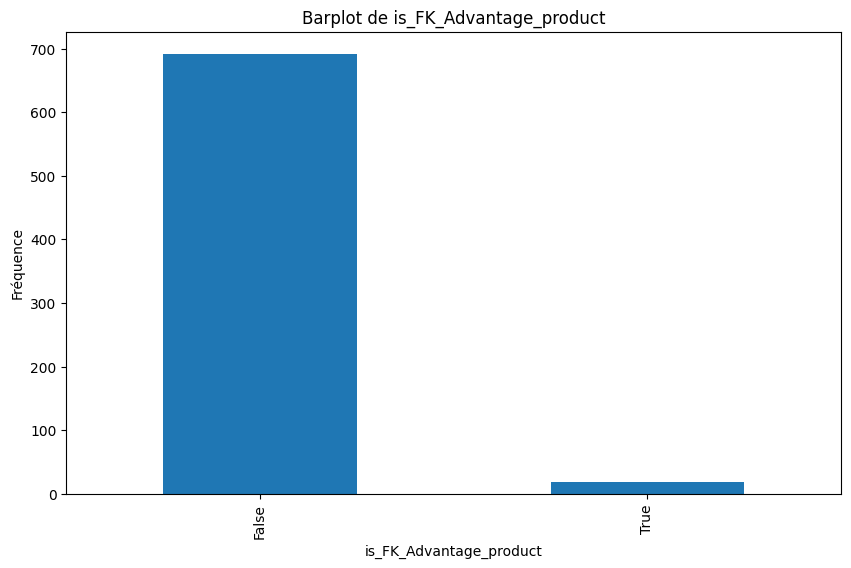

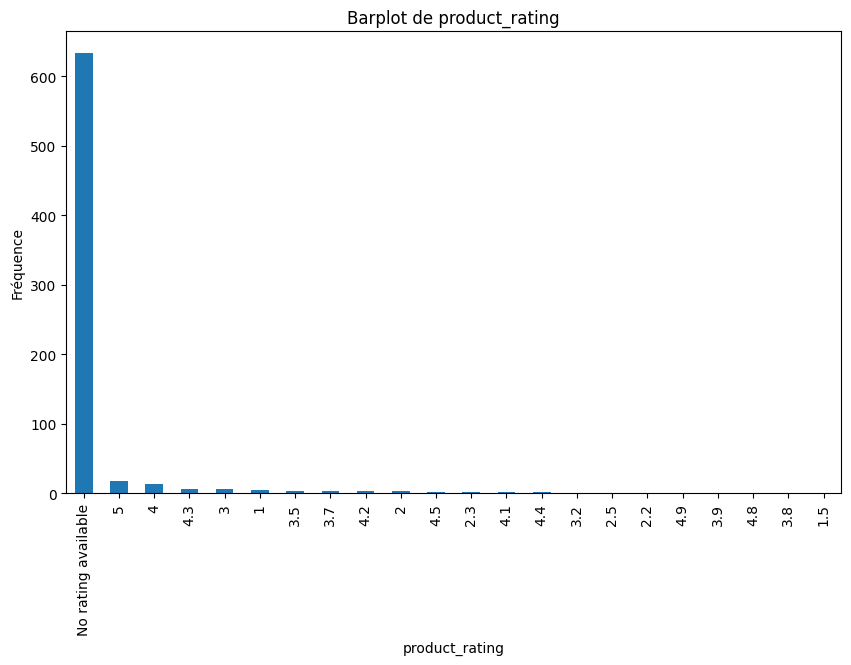

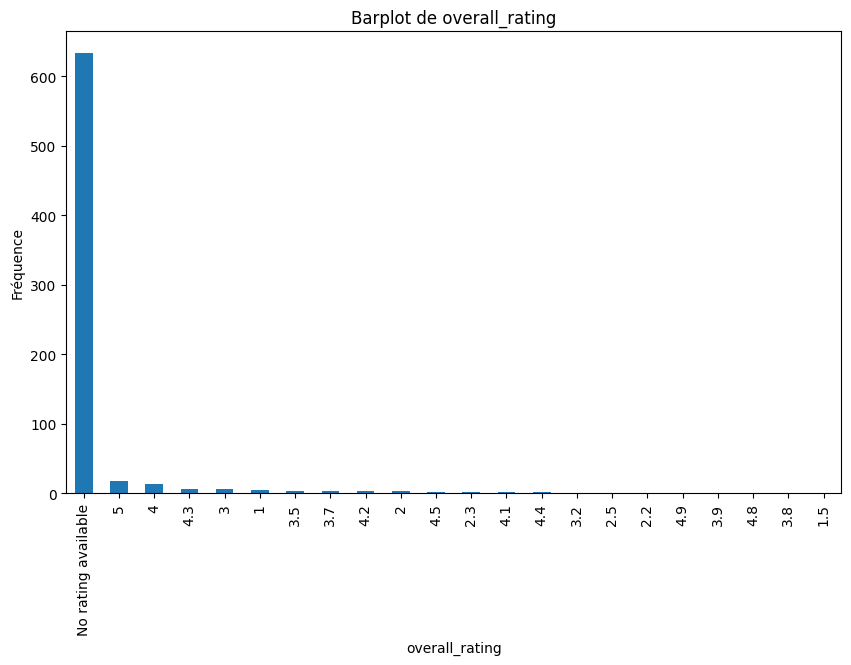

In [11]:
import matplotlib.pyplot as plt

# Liste des variables à tracer
variables_to_plot = [ 'is_FK_Advantage_product', 'product_rating', 'overall_rating']

# Parcours des variables et création des barplots
for column in variables_to_plot:
    plt.figure(figsize=(10, 6))

    # Si la variable est booléenne, nous tracions un barplot de comptage
    if df[column].dtype == bool:
        df[column].value_counts().plot(kind='bar')
    else:
        # Si la variable n'est pas booléenne, nous tracions un barplot de fréquence
        df[column].value_counts().plot(kind='bar')

    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.title(f'Barplot de {column}')
    plt.show()

In [12]:
# Compter le nombre d'occurrences de chaque marque
top_10_brands = df['brand'].value_counts().head(10)

print("Les 10 marques les plus présentes :")
print(top_10_brands)


Les 10 marques les plus présentes :
brand
PRINT SHAPES      11
Lapguard          11
Lal Haveli        10
Aroma Comfort      8
Raymond            8
Smartpro           7
Wallmantra         7
Tenda              7
HP                 6
Home Originals     6
Name: count, dtype: int64


In [13]:
# Compter le nombre d'occurrences de product_category_tree
top_10_product_category_tree = df['product_category_tree'].value_counts().head(10)

print("Les 10 product_category_tree les plus présentes :")
print(top_10_product_category_tree)


Les 10 product_category_tree les plus présentes :
product_category_tree
["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                                                                  56
["Home Furnishing >> Bath Linen >> Towels"]                                                                                    19
["Home Furnishing >> Cushions, Pillows & Covers >> Cushion Covers"]                                                            10
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Lal Haveli Ethnic"]                                                    10
["Computers >> Laptop Accessories >> Batteries >> Lapguard Batteries"]                                                         10
["Home Furnishing >> Curtains & Accessories >> Curtains"]                                                                       9
["Computers >> Laptop Accessories >> Adapters >> Smartpro Adapters >> Smartpro 19.5v,3.9a Replacement Charger for Vaio..."]     7
["Computers >> Net

# Prétraitement du texte :

Utiliser la tokenization pour diviser le texte en mots.

In [14]:
import nltk
from nltk.tokenize import word_tokenize

# Assurez-vous que les packages de NLTK sont téléchargés
nltk.download('punkt')

# Fonction de tokenisation
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenisation du texte
    return tokens

# Appliquer la tokenisation à la colonne 'description'
df['description_tokens'] = df['description'].apply(tokenize_text)

# Afficher les 10 premières lignes pour vérifier
print(df['description_tokens'].head(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0     [Key, Features, of, Elegance, Polyester, Multi...
1     [Specifications, of, Sathiyas, Cotton, Bath, T...
3     [Key, Features, of, SANTOSH, ROYAL, FASHION, C...
4     [Key, Features, of, Jaipur, Print, Cotton, Flo...
33    [Key, Features, of, SANTOSH, ROYAL, FASHION, C...
34    [Key, Features, of, House, This, Queen, Cotton...
35    [Buy, Riva, Carpets, Cotton, Free, Bath, Mat, ...
36    [Myesquire, Ceramic, Burner, Pot, Lemongrass, ...
37    [Key, Features, of, Dungri, India, Craft, Ducj...
38    [Key, Features, of, BFT, 6, W, LED, Bulb, Pack...
Name: description_tokens, dtype: object


Effectuer un nettoyage en retirant la ponctuation, les stopwords, etc.

In [15]:
import nltk
from nltk.corpus import stopwords
import string

# On s'assure que les packages de NLTK sont téléchargés
nltk.download('stopwords')
nltk.download('punkt')

# Fonction de nettoyage
def clean_text(tokens):
    # Suppression de la ponctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Chargement des stopwords
    stop_words = set(stopwords.words('english'))

    # Suppression des stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Retourner les tokens nettoyés
    return tokens

# Appliquer la fonction de nettoyage à la colonne 'description_tokens'
df['clean_description_tokens'] = df['description_tokens'].apply(clean_text)

# Afficher les 10 premières lignes pour vérifier
print(df['clean_description_tokens'].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     [Key, Features, Elegance, Polyester, Multicolo...
1     [Specifications, Sathiyas, Cotton, Bath, Towel...
3     [Key, Features, SANTOSH, ROYAL, FASHION, Cotto...
4     [Key, Features, Jaipur, Print, Cotton, Floral,...
33    [Key, Features, SANTOSH, ROYAL, FASHION, Cotto...
34    [Key, Features, House, Queen, Cotton, Duvet, C...
35    [Buy, Riva, Carpets, Cotton, Free, Bath, Mat, ...
36    [Myesquire, Ceramic, Burner, Pot, Lemongrass, ...
37    [Key, Features, Dungri, India, Craft, Ducjug01...
38    [Key, Features, BFT, 6, W, LED, Bulb, Pack, 1,...
Name: clean_description_tokens, dtype: object


Effectuer une lemmatization pour ramener les mots à leur forme canonique.


In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')


# Assurez-vous que les packages de NLTK sont téléchargés
nltk.download('wordnet')

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction de lemmatisation
def lemmatize_text(tokens):
    # Mappe les étiquettes de partie de discours de TreeBank à celles de WordNet
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

    # Obtient les étiquettes de partie de discours pour chaque token
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatise chaque token en utilisant son étiquette de partie de discours correspondante
    lemmatized_tokens = []
    for word, tag in pos_tags:
        pos = get_wordnet_pos(tag) or wordnet.NOUN  # Si l'étiquette n'est pas trouvée, par défaut, elle est considérée comme un nom
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_tokens.append(lemmatized_word)

    # Retourner les tokens lemmatisés
    return lemmatized_tokens

# Appliquer la fonction de lemmatisation à la colonne 'clean_description_tokens'
df['lemmatized_description_tokens'] = df['clean_description_tokens'].apply(lemmatize_text)

# Afficher les 10 premières lignes pour vérifier
print(df['lemmatized_description_tokens'].head(10))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0     [Key, Features, Elegance, Polyester, Multicolo...
1     [Specifications, Sathiyas, Cotton, Bath, Towel...
3     [Key, Features, SANTOSH, ROYAL, FASHION, Cotto...
4     [Key, Features, Jaipur, Print, Cotton, Floral,...
33    [Key, Features, SANTOSH, ROYAL, FASHION, Cotto...
34    [Key, Features, House, Queen, Cotton, Duvet, C...
35    [Buy, Riva, Carpets, Cotton, Free, Bath, Mat, ...
36    [Myesquire, Ceramic, Burner, Pot, Lemongrass, ...
37    [Key, Features, Dungri, India, Craft, Ducjug01...
38    [Key, Features, BFT, 6, W, LED, Bulb, Pack, 1,...
Name: lemmatized_description_tokens, dtype: object


# Représentation des données textuelles :

Créer un sac de mots (Bag of Words) et calculer le TF-IDF pour représenter chaque document textuel.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Créer un vectoriseur de mots en sac (Bag of Words)
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(df['lemmatized_description_tokens'].apply(lambda x: ' '.join(x)))

# Calculer le TF-IDF
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(bag_of_words)

# Afficher la taille de la matrice TF-IDF
print("Taille de la matrice TF-IDF :", tfidf_matrix.shape)


Taille de la matrice TF-IDF : (710, 4991)


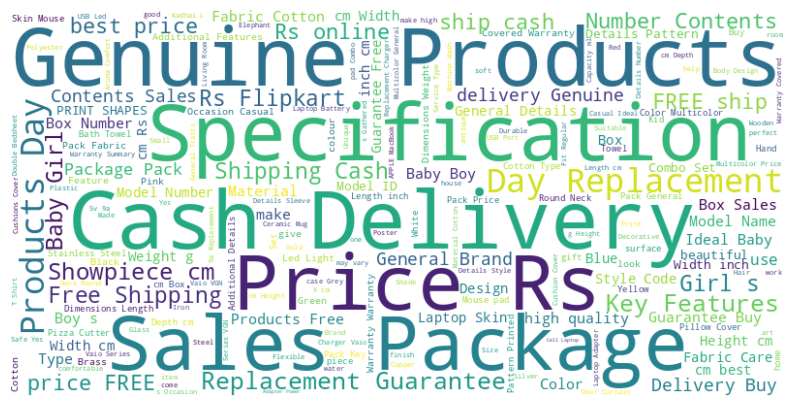

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer toutes les descriptions lemmatisées en une seule chaîne
all_words = ' '.join(df['lemmatized_description_tokens'].explode().dropna())

# Créer un objet WordCloud avec les paramètres souhaités
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Afficher le nuage de mots
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Réduction de dimension :

Appliquer une Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité des données.

In [19]:
from sklearn.decomposition import PCA  # Importer la classe PCA depuis le module appropriate

# Initialiser l'objet PCA sans spécifier le nombre de composantes
pca_var = PCA()

# Appliquer l'ACP sur la matrice TF-IDF
tfidf_pca_var = pca_var.fit(tfidf_matrix.toarray())

# Calculer la variance expliquée par chaque composante
explained_variance_ratio_cumulative = np.cumsum(pca_var.explained_variance_ratio_)

# Trouver le nombre de composantes nécessaires pour conserver 70% de la variance
nombre_composantes_70_variance = np.argmax(explained_variance_ratio_cumulative >= 0.7) + 1

print("Nombre de composantes nécessaires pour conserver 70% de la variance :", nombre_composantes_70_variance)

# Réappliquer l'ACP avec ce nombre de composantes
pca_70_variance = PCA(n_components=nombre_composantes_70_variance)
tfidf_pca_70_variance = pca_70_variance.fit_transform(tfidf_matrix.toarray())


Nombre de composantes nécessaires pour conserver 70% de la variance : 236


# Visualisation en 2D :

Utiliser le T-SNE pour réduire les features à 2 dimensions.
Colorier les points en fonction de leur catégorie réelle.


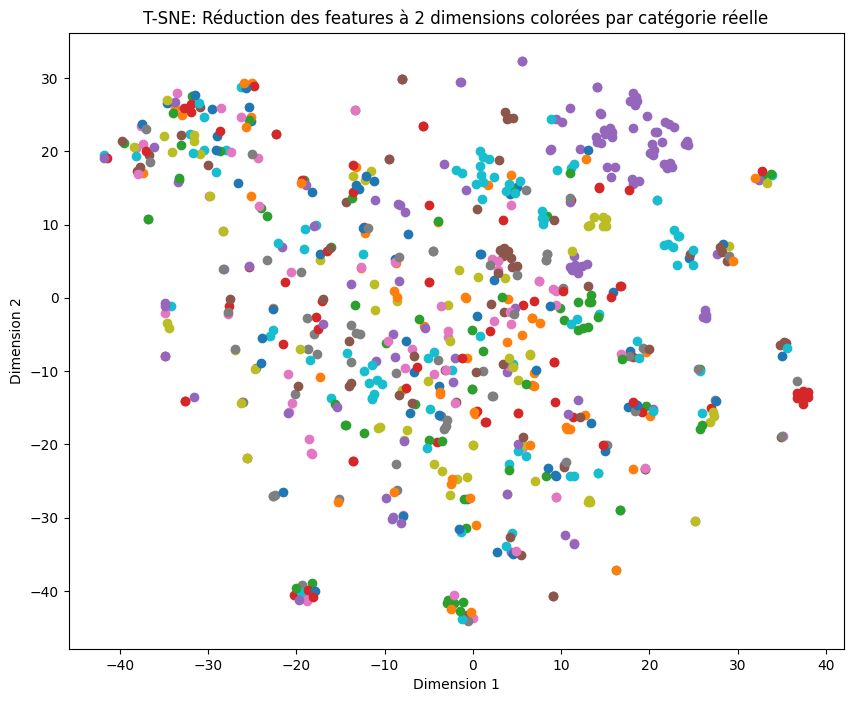

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialiser l'objet TSNE
tsne = TSNE(n_components=2, random_state=42)

# Appliquer le T-SNE sur les données TF-IDF réduites par l'ACP
tfidf_tsne = tsne.fit_transform(tfidf_pca_70_variance)  # Utilisation de tfidf_pca_70_variance du précédent exemple

# Créer un graphique
plt.figure(figsize=(10, 8))

# Colorier les points en fonction de leur catégorie réelle
for category in df['product_category_tree'].unique():
    plt.scatter(tfidf_tsne[df['product_category_tree'] == category][:, 0],
                tfidf_tsne[df['product_category_tree'] == category][:, 1],
                label=category)


# Afficher le graphique
plt.title("T-SNE: Réduction des features à 2 dimensions colorées par catégorie réelle")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

Les différentes valeurs de chaque grooupe ici les points sont très éparpillées

# Clustering :

Appliquer l'algorithme de clustering K-Means avec k=7 clusters sur les 2 composantes obtenues par le T-SNE.

Colorier les points en fonction du numéro de cluster attribué par K-Means.

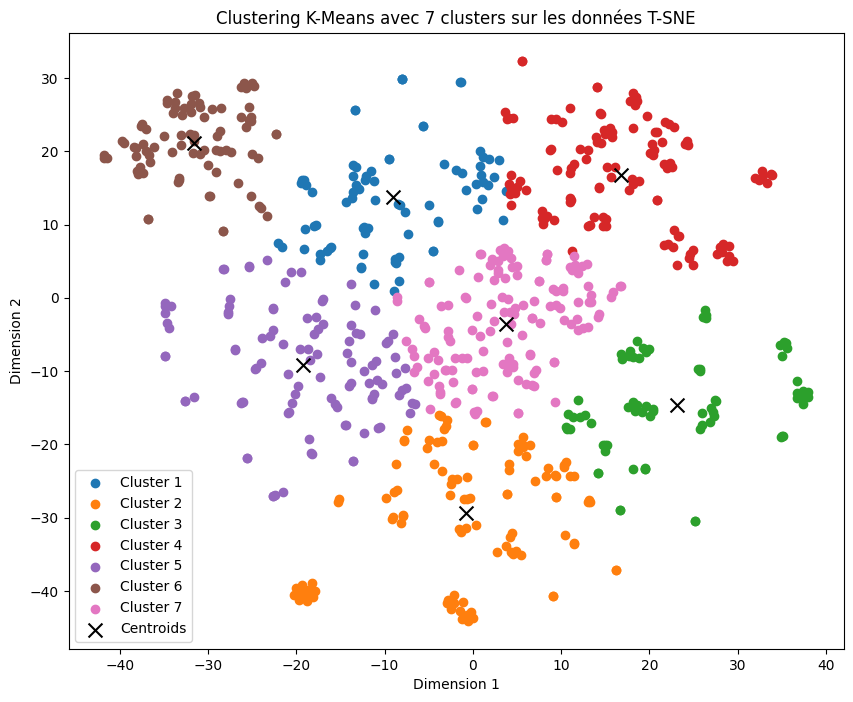

In [21]:
from sklearn.cluster import KMeans  # Importer la classe KMeans depuis le module appropriate

# Appliquer le T-SNE sur les données TF-IDF réduites par l'ACP avec 70% de variance
tfidf_pca_70_variance_tsne = tsne.fit_transform(tfidf_pca_70_variance)

# Initialiser l'objet KMeans avec k=7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Appliquer K-Means sur les données T-SNE
kmeans.fit(tfidf_pca_70_variance_tsne)

# Obtenir les étiquettes de cluster attribuées par K-Means
labels = kmeans.labels_

# Créer un graphique
plt.figure(figsize=(10, 8))

# Colorier les points en fonction du numéro de cluster attribué par K-Means
for i in range(7):
    plt.scatter(tfidf_pca_70_variance_tsne[labels == i][:, 0],
                tfidf_pca_70_variance_tsne[labels == i][:, 1],
                label=f'Cluster {i+1}')

# Afficher les centres des clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='black', marker='x', label='Centroids')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.title("Clustering K-Means avec 7 clusters sur les données T-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


Les points représentants de chaque couleur représentant chauque groupe ne sont pas les memes que pour le TSNE, ils ne sont pas éparpillés le K-means ne prédit pas les memes groupes.
K-Means suppose des clusters sphériques et équilibrés en termes de taille, ce qui peut ne pas correspondre à la structure réelle des données.

In [22]:
# Ajouter les étiquettes de cluster au DataFrame
df['cluster_labels'] = labels  # Supposons que 'labels' contient les étiquettes de cluster attribuées par K-Means

# Evaluation de la similarité :

Calculer l'Adjusted Rand Score (ARI) pour comparer la catégorisation réelle avec celle obtenue par le clustering.

Une valeur d'ARI autour de 0.4 à 0.5 indique une bonne similarité entre les catégories réelles et les clusters obtenus, confirmant ainsi la faisabilité de la classification automatique des produits.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Définir le vecteuriseur pour l'approche BoW
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(df['lemmatized_description_tokens'].apply(lambda x: ' '.join(x)))

# Définir le vecteuriseur pour l'approche TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_description_tokens'].apply(lambda x: ' '.join(x)))

# Initialiser le modèle de clustering KMeans
kmeans = KMeans(n_clusters=7, random_state=42)

# Entraîner le modèle KMeans avec l'approche BoW
predicted_bow_clusters = kmeans.fit_predict(bow_matrix)

# Entraîner le modèle KMeans avec l'approche TF-IDF
predicted_tfidf_clusters = kmeans.fit_predict(tfidf_matrix)


In [24]:
# Calculer l'ARI pour l'approche BoW
ari_bow = adjusted_rand_score(df['product_category_tree'], predicted_bow_clusters)

# Calculer l'ARI pour l'approche TF-IDF
ari_tfidf = adjusted_rand_score(df['product_category_tree'], predicted_tfidf_clusters)

print("ARI pour l'approche BoW:", ari_bow)
print("ARI pour l'approche TF-IDF:", ari_tfidf)


ARI pour l'approche BoW: 0.012991031878840497
ARI pour l'approche TF-IDF: 0.028060752988776774


Nos score tres bas de l'ARI indique que les clusters trouvés par l'algorithme de clustering sont très différents des catégories réelles. En d'autres termes, il y a peu de concordance entre les clusters prédits et les étiquettes de catégories réelles, on va tester d'atres méthodes pour analyser la faisabilité de la classification automatique des description de produit.



In [25]:
csv_path = '/content/drive/MyDrive/openclass/df.csv'
df.to_csv(csv_path, index=False)
